In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.simplefilter('ignore')


In [2]:
data = pd.read_csv('titanic.csv')
data = data[['Age','Fare','Survived']]

data

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


Mean

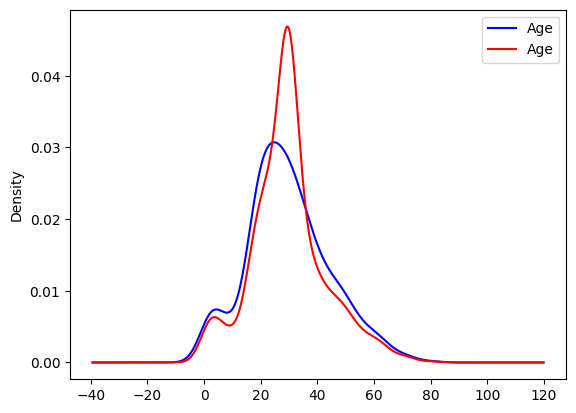

In [3]:
data_mean = data.copy() 
value_mean = data_mean['Age'].dropna().mean()  
data_mean['Age'].fillna(value_mean, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_mean['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


Median

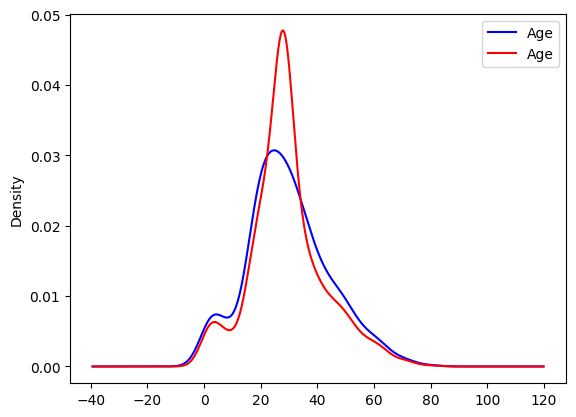

In [4]:
data_median = data.copy() 
value_median = data_median['Age'].dropna().median()  
data_median['Age'].fillna(value_median, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_median['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Mode

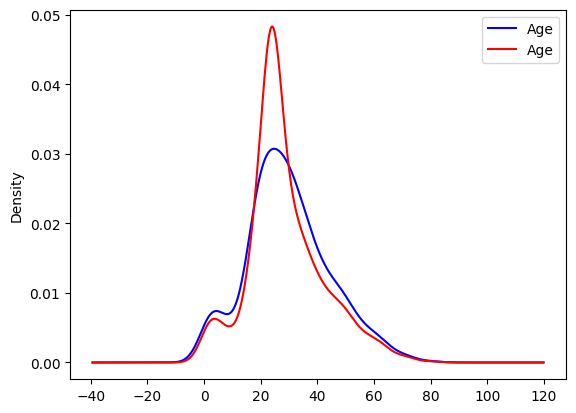

In [5]:
data_mode = data.copy() 
value_mode = data_mode['Age'].dropna().mode()[0]  
data_mode['Age'].fillna(value_mode, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_mode['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

giá trị ngẫu nhiên

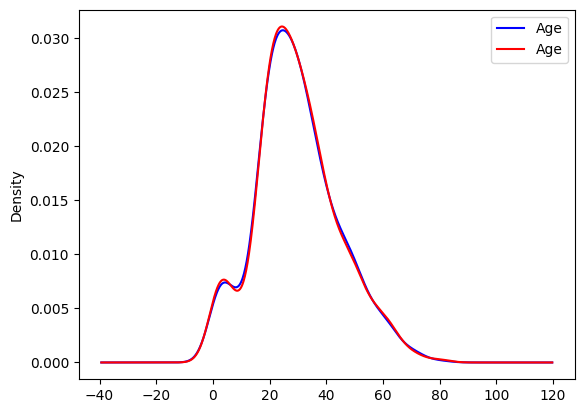

In [6]:
data_random = data.copy()
value_random = data_random['Age'].dropna().sample(n=data['Age'].isnull().sum(), random_state=0)
value_random.index = data_random[data_random['Age'].isnull()].index
data_random['Age'].update(value_random)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_random['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

 giá trị đuôi của phân bố

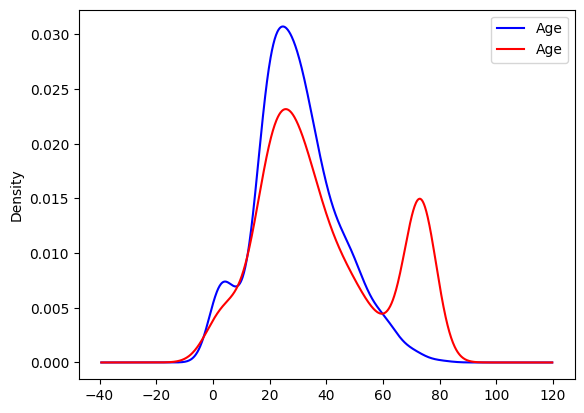

In [7]:
data_extreme = data.copy()
value_extreme = data_extreme['Age'].mean() + 3*data_extreme['Age'].std()
data_extreme['Age'].fillna(value_extreme, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_extreme['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

giá trị bất kỳ

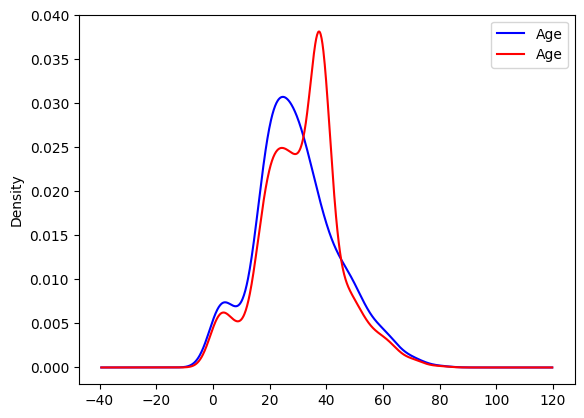

In [8]:
data_arbitrary = data.copy()
data_arbitrary['Age'].fillna(38, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_arbitrary['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Tạo đặc trưng mới

In [9]:
def add_age_nan(data):
  data['Age_nan'] = np.where(data['Age'].isnull(), 1, 0)
  return data
data_add_new_feature = data.copy()
data_add_new_feature = add_age_nan(data_add_new_feature)
data_add_new_feature['Age'].fillna(38, inplace=True)

Xử lí ngoại lệ

<Axes: >

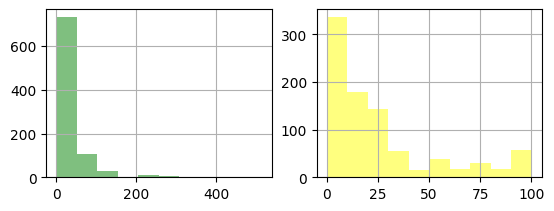

In [10]:

def outlier_process(data):
  dttemp = data.copy()

  Bienduoi1 = dttemp['Age'].mean() - 3*dttemp['Age'].std()
  Bientren1 = dttemp['Age'].mean() + 3*dttemp['Age'].std()

  dttemp.loc[dttemp['Age'] < Bienduoi1, 'Age'] = Bienduoi1
  dttemp.loc[dttemp['Age'] > Bientren1, 'Age'] = Bientren1

  iqr = dttemp['Fare'].quantile(0.75) - dttemp['Fare'].quantile(0.25)
  Bientren1 = dttemp['Fare'].quantile(0.75) + 3*iqr
  Bienduoi1= dttemp['Fare'].quantile(0.25) - 3*iqr

  dttemp.loc[dttemp['Fare'] < Bienduoi1, 'Fare'] = Bienduoi1
  dttemp.loc[dttemp['Fare'] > Bientren1, 'Fare'] = Bientren1

  return dttemp


data_outlier = outlier_process(data)
# histogram
plt.subplot(2,2,1)
data['Fare'].hist(color='green', alpha=0.5)
plt.subplot(2,2,2)
data_outlier['Fare'].hist(color='yellow', alpha=0.5)





## BÀi 5.1+ 5.2

Các kĩ thuật chuẩn hóa, lần lượt là z-Score, Min-max, Robust

In [11]:
from sklearn.preprocessing import StandardScaler
def z_Score(data, isAge_nan =False):
  if isAge_nan:
    newdata = pd.DataFrame(StandardScaler().fit_transform(data[['Age', 'Fare', 'Age_nan']]), columns=['Age', 'Fare','Age_nan'])
  else:
    newdata = pd.DataFrame(StandardScaler().fit_transform(data[['Age', 'Fare']]), columns=['Age', 'Fare'])
     
  newdata['Survived'] = data['Survived']

  return newdata

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
def min_Max(data):
    newdata = pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
    return newdata


from sklearn.preprocessing import RobustScaler
robust_caler=RobustScaler()
def Robust(data):
    return pd.DataFrame(robust_caler.fit_transform(data),columns=data.columns)


from sklearn.preprocessing import MaxAbsScaler
max_abs=MaxAbsScaler()
def max_Abs(data):
    newdata = pd.DataFrame(max_abs.fit_transform(data),columns=data.columns)
    return newdata


from sklearn.preprocessing import QuantileTransformer

def quantile_Transformer(data):
    newdata = pd.DataFrame(QuantileTransformer().fit_transform(data),columns=data.columns)
    return newdata



from sklearn.preprocessing import PowerTransformer

def power_Transformer(data, isAge_nan=False):
 
  if isAge_nan:
    newdata = pd.DataFrame(PowerTransformer().fit_transform(data[['Age', 'Fare', 'Age_nan']]), columns=['Age', 'Fare','Age_nan'])
  else:
    newdata = pd.DataFrame(PowerTransformer().fit_transform(data[['Age', 'Fare']]), columns=['Age', 'Fare'])
     
  newdata['Survived'] = data['Survived']
  return newdata


from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
def Normalizer_(data, isAge_nan =False):

  if isAge_nan:
    newdata = pd.DataFrame(normalizer.fit_transform(data[['Age', 'Fare', 'Age_nan']]), columns=['Age', 'Fare','Age_nan'])
  else:
    newdata = pd.DataFrame(normalizer.fit_transform(data[['Age', 'Fare']]), columns=['Age', 'Fare'])
     
  newdata['Survived'] = data['Survived']

  return newdata



In [12]:


def mean_accuracy(data, is_data_add_new_feature):
  accuracies = []
  
  for i in range(10):
    predictors = data[['Age', 'Fare']]
    if is_data_add_new_feature==True:
      predictors = data[['Age', 'Fare','Age_nan']]  
    target = data['Survived']
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    classifier.predict(x_test)
    accuracy = classifier.score(x_test, y_test)
    accuracies.append(accuracy)

  return np.mean(accuracies)

In [13]:


accuracy_normal = {
  'mean': mean_accuracy(data_mean,False),
  'median': mean_accuracy(data_median,False),
  'mode': mean_accuracy(data_mode,False),
  'random': mean_accuracy(data_random,False),
  'extreme': mean_accuracy(data_extreme,False),
  'arbitrary': mean_accuracy(data_arbitrary,False),
  'addnewfeature': mean_accuracy(data_add_new_feature, True)
}
accuracy_normal_min_max = {
  'mean': mean_accuracy(min_Max(data_mean),False),
  'median': mean_accuracy(min_Max(data_median),False),
  'mode': mean_accuracy(min_Max(data_mode),False),
  'random': mean_accuracy(min_Max(data_random),False),
  'extreme': mean_accuracy(min_Max(data_extreme),False),
  'arbitrary': mean_accuracy(min_Max(data_arbitrary),False),
  'addnewfeature': mean_accuracy(min_Max(data_add_new_feature), True)
}


accuracy_normal_robust = {
  'mean': mean_accuracy(Robust(data_mean),False),
  'median': mean_accuracy(Robust(data_median),False),
  'mode': mean_accuracy(Robust(data_mode),False),
  'random': mean_accuracy(Robust(data_random),False),
  'extreme': mean_accuracy(Robust(data_extreme),False),
  'arbitrary': mean_accuracy(Robust(data_arbitrary),False),
  'addnewfeature': mean_accuracy(Robust(data_add_new_feature), True)
}
accuracy_outlier_process_robust = {
  'mean': mean_accuracy(Robust(outlier_process(data_mean)),False),
  'median': mean_accuracy(Robust(outlier_process(data_median)),False),
  'mode': mean_accuracy(Robust(outlier_process(data_mode)),False),
  'random': mean_accuracy(Robust(outlier_process(data_random)),False),
  'extreme': mean_accuracy(Robust(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(Robust(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(Robust(outlier_process(data_add_new_feature)),True)

}

accuracy_outlier_process = {
  'mean': mean_accuracy(outlier_process(data_mean),False),
  'median': mean_accuracy(outlier_process(data_median),False),
  'mode': mean_accuracy(outlier_process(data_mode),False),
  'random': mean_accuracy(outlier_process(data_random),False),
  'extreme': mean_accuracy(outlier_process(data_extreme),False),
  'arbitrary': mean_accuracy(outlier_process(data_arbitrary),False),
  'addnewfeature': mean_accuracy(outlier_process(data_add_new_feature),True)

}

accuracy_outlier_process_min_max = {
  'mean': mean_accuracy(min_Max(outlier_process(data_mean)),False),
  'median': mean_accuracy(min_Max(outlier_process(data_median)),False),
  'mode': mean_accuracy(min_Max(outlier_process(data_mode)),False),
  'random': mean_accuracy(min_Max(outlier_process(data_random)),False),
  'extreme': mean_accuracy(min_Max(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(min_Max(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(min_Max(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_z_Score = {
  'mean': mean_accuracy(z_Score(data_mean),False),
  'median': mean_accuracy(z_Score(data_median),False),
  'mode': mean_accuracy(z_Score(data_mode),False),
  'random': mean_accuracy(z_Score(data_random),False),
  'extreme': mean_accuracy(z_Score(data_extreme),False),
  'arbitrary': mean_accuracy(z_Score(data_arbitrary),False),
  'addnewfeature': mean_accuracy(z_Score(data_add_new_feature, True), True)
}
accuracy_outlier_process_z_Score = {
  'mean': mean_accuracy(z_Score(outlier_process(data_mean)),False),
  'median': mean_accuracy(z_Score(outlier_process(data_median)),False),
  'mode': mean_accuracy(z_Score(outlier_process(data_mode)),False),
  'random': mean_accuracy(z_Score(outlier_process(data_random)),False),
  'extreme': mean_accuracy(z_Score(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(z_Score(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(z_Score(outlier_process(data_add_new_feature), True),True)

}

accuracy_normal_max_Abs = {
  'mean': mean_accuracy(max_Abs(data_mean),False),
  'median': mean_accuracy(max_Abs(data_median),False),
  'mode': mean_accuracy(max_Abs(data_mode),False),
  'random': mean_accuracy(max_Abs(data_random),False),
  'extreme': mean_accuracy(max_Abs(data_extreme),False),
  'arbitrary': mean_accuracy(max_Abs(data_arbitrary),False),
  'addnewfeature': mean_accuracy(max_Abs(data_add_new_feature), True)
}
accuracy_outlier_process_max_Abs = {
  'mean': mean_accuracy(max_Abs(outlier_process(data_mean)),False),
  'median': mean_accuracy(max_Abs(outlier_process(data_median)),False),
  'mode': mean_accuracy(max_Abs(outlier_process(data_mode)),False),
  'random': mean_accuracy(max_Abs(outlier_process(data_random)),False),
  'extreme': mean_accuracy(max_Abs(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(max_Abs(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(max_Abs(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_quantile_Transformer = {
  'mean': mean_accuracy(quantile_Transformer(data_mean),False),
  'median': mean_accuracy(quantile_Transformer(data_median),False),
  'mode': mean_accuracy(quantile_Transformer(data_mode),False),
  'random': mean_accuracy(quantile_Transformer(data_random),False),
  'extreme': mean_accuracy(quantile_Transformer(data_extreme),False),
  'arbitrary': mean_accuracy(quantile_Transformer(data_arbitrary),False),
  'addnewfeature': mean_accuracy(quantile_Transformer(data_add_new_feature), True)
}
accuracy_outlier_process_quantile_Transformer = {
  'mean': mean_accuracy(quantile_Transformer(outlier_process(data_mean)),False),
  'median': mean_accuracy(quantile_Transformer(outlier_process(data_median)),False),
  'mode': mean_accuracy(quantile_Transformer(outlier_process(data_mode)),False),
  'random': mean_accuracy(quantile_Transformer(outlier_process(data_random)),False),
  'extreme': mean_accuracy(quantile_Transformer(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(quantile_Transformer(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(quantile_Transformer(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_power_Transformer = {
  'mean': mean_accuracy(power_Transformer(data_mean),False),
  'median': mean_accuracy(power_Transformer(data_median),False),
  'mode': mean_accuracy(power_Transformer(data_mode),False),
  'random': mean_accuracy(power_Transformer(data_random),False),
  'extreme': mean_accuracy(power_Transformer(data_extreme),False),
  'arbitrary': mean_accuracy(power_Transformer(data_arbitrary),False),
  'addnewfeature': mean_accuracy(power_Transformer(data_add_new_feature, True), True)
}
accuracy_outlier_process_power_Transformer = {
  'mean': mean_accuracy(power_Transformer(outlier_process(data_mean)),False),
  'median': mean_accuracy(power_Transformer(outlier_process(data_median)),False),
  'mode': mean_accuracy(power_Transformer(outlier_process(data_mode)),False),
  'random': mean_accuracy(power_Transformer(outlier_process(data_random)),False),
  'extreme': mean_accuracy(power_Transformer(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(power_Transformer(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(power_Transformer(outlier_process(data_add_new_feature), True),True)

}



accuracy_normal_Normalizer = {
  'mean': mean_accuracy(Normalizer_(data_mean),False),
  'median': mean_accuracy(Normalizer_(data_median),False),
  'mode': mean_accuracy(Normalizer_(data_mode),False),
  'random': mean_accuracy(Normalizer_(data_random),False),
  'extreme': mean_accuracy(Normalizer_(data_extreme),False),
  'arbitrary': mean_accuracy(Normalizer_(data_arbitrary),False),
  'addnewfeature': mean_accuracy(Normalizer_(data_add_new_feature, True), True)
}

accuracy_outlier_process_Normalizer = {
  'mean': mean_accuracy(Normalizer_(outlier_process(data_mean)),False),
  'median': mean_accuracy(Normalizer_(outlier_process(data_median)),False),
  'mode': mean_accuracy(Normalizer_(outlier_process(data_mode)),False),
  'random': mean_accuracy(Normalizer_(outlier_process(data_random)),False),
  'extreme': mean_accuracy(Normalizer_(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(Normalizer_(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(Normalizer_(outlier_process(data_add_new_feature), True),True)

}




df = pd.DataFrame({'Normal': accuracy_normal,
                  'Normal_z_Score':accuracy_normal_z_Score,
                  'Normal_min_Max':accuracy_normal_min_max,
                  'Normal_Robust':accuracy_normal_robust,
                  'Normal_max_Abs':accuracy_normal_max_Abs,
                  'Normal_normalizer':accuracy_normal_Normalizer,
                  'Normal_quantile_Transformer':accuracy_normal_quantile_Transformer,
                  'Normal_power_Transformer':accuracy_normal_power_Transformer,

                  'Outlier':accuracy_outlier_process,
                  'Oulier_z_Score':accuracy_outlier_process_z_Score,
                  'Outlier_min_Max': accuracy_outlier_process_min_max ,
                  'Outlier_Robust': accuracy_outlier_process_robust,
                  'Outlier_max_Abs':accuracy_outlier_process_max_Abs,
                  'Outlier_normalizer':accuracy_outlier_process_Normalizer,
                  'Outlier_quantile_Transformer':accuracy_outlier_process_quantile_Transformer,
                  'Outlier_power_Transformer':accuracy_outlier_process_power_Transformer,


                  })




bảng thông kê + các giá trị lớn nhất trong từng cột

In [14]:
styled_df = df.style.highlight_max(color='#1689dd', axis=0)
styled_df

,Normal,Normal_z_Score,Normal_min_Max,Normal_Robust,Normal_max_Abs,Normal_normalizer,Normal_quantile_Transformer,Normal_power_Transformer,Outlier,Oulier_z_Score,Outlier_min_Max,Outlier_Robust,Outlier_max_Abs,Outlier_normalizer,Outlier_quantile_Transformer,Outlier_power_Transformer
mean,0.652985,0.653358,0.646269,0.652985,0.646269,0.685448,0.669403,0.669030,0.667164,0.666791,0.669030,0.666791,0.669030,0.685075,0.668657,0.668657
median,0.653358,0.653358,0.647015,0.653358,0.647015,0.685075,0.672761,0.668657,0.667164,0.666045,0.669403,0.666045,0.669403,0.685448,0.670896,0.669403
mode,0.653358,0.652612,0.645522,0.653358,0.645522,0.686194,0.667910,0.667537,0.665672,0.665672,0.668657,0.665672,0.668657,0.686940,0.667910,0.670149
random,0.654478,0.653731,0.647015,0.655224,0.647015,0.676119,0.667910,0.668657,0.667910,0.668284,0.668657,0.667910,0.668657,0.677612,0.667537,0.668284
extreme,0.663806,0.663433,0.644776,0.663060,0.644776,0.690672,0.668657,0.670522,0.666418,0.666791,0.664925,0.666791,0.664925,0.693284,0.669776,0.669403
arbitrary,0.657463,0.657463,0.644776,0.656343,0.645149,0.686567,0.669403,0.669776,0.666045,0.666418,0.664925,0.665672,0.664925,0.685821,0.668657,0.672015
addnewfeature,0.659328,0.659328,0.643284,0.660075,0.643284,0.686567,0.669030,0.670896,0.662313,0.662687,0.663060,0.662687,0.663060,0.685821,0.669030,0.672761


Giá trị lớn nhất trong bảng

In [15]:

styled_df2 = df.style.highlight_max( color='#D21312',axis=None)
styled_df2 

,Normal,Normal_z_Score,Normal_min_Max,Normal_Robust,Normal_max_Abs,Normal_normalizer,Normal_quantile_Transformer,Normal_power_Transformer,Outlier,Oulier_z_Score,Outlier_min_Max,Outlier_Robust,Outlier_max_Abs,Outlier_normalizer,Outlier_quantile_Transformer,Outlier_power_Transformer
mean,0.652985,0.653358,0.646269,0.652985,0.646269,0.685448,0.669403,0.669030,0.667164,0.666791,0.669030,0.666791,0.669030,0.685075,0.668657,0.668657
median,0.653358,0.653358,0.647015,0.653358,0.647015,0.685075,0.672761,0.668657,0.667164,0.666045,0.669403,0.666045,0.669403,0.685448,0.670896,0.669403
mode,0.653358,0.652612,0.645522,0.653358,0.645522,0.686194,0.667910,0.667537,0.665672,0.665672,0.668657,0.665672,0.668657,0.686940,0.667910,0.670149
random,0.654478,0.653731,0.647015,0.655224,0.647015,0.676119,0.667910,0.668657,0.667910,0.668284,0.668657,0.667910,0.668657,0.677612,0.667537,0.668284
extreme,0.663806,0.663433,0.644776,0.663060,0.644776,0.690672,0.668657,0.670522,0.666418,0.666791,0.664925,0.666791,0.664925,0.693284,0.669776,0.669403
arbitrary,0.657463,0.657463,0.644776,0.656343,0.645149,0.686567,0.669403,0.669776,0.666045,0.666418,0.664925,0.665672,0.664925,0.685821,0.668657,0.672015
addnewfeature,0.659328,0.659328,0.643284,0.660075,0.643284,0.686567,0.669030,0.670896,0.662313,0.662687,0.663060,0.662687,0.663060,0.685821,0.669030,0.672761


In [41]:
print("Bước chuẩn hóa:")
print((df['Normal_z_Score']-df['Normal']).mean()*100)
print((df['Normal_min_Max']-df['Normal']).mean()*100)
print((df['Normal_max_Abs']-df['Normal']).mean()*100)
print((df['Normal_Robust']-df['Normal']).mean()*100)
print((df['Normal_normalizer']-df['Normal']).mean()*100)
print((df['Normal_power_Transformer']-df['Normal']).mean()*100)
print((df['Normal_quantile_Transformer']-df['Normal']).mean()*100)
print("TB độ cải thiện độ chính xác qua bước chuẩn hóa:")
print( ((df['Normal_z_Score'] + df['Normal_min_Max'] + df['Normal_max_Abs'] +df['Normal_Robust'] + df['Normal_normalizer'] + df['Normal_power_Transformer'] + df['Normal_quantile_Transformer']).mean()/7 -df['Normal'].mean())*100 )

Bước chuẩn hóa:
-0.02132196162046851
-1.0874200426439258
-1.082089552238809
-0.005330490405118317
2.8837953091684447
1.2899786780383757
1.2899786780383726
TB độ cải thiện độ chính xác qua bước chuẩn hóa:
0.46679865976241297


In [44]:
print('Bước xử lí ngoại lệ')

print((df['Outlier']-df['Normal']).mean()*100)
print((df['Oulier_z_Score']-df['Normal_z_Score']).mean()*100)
print((df['Outlier_min_Max']-df['Normal_min_Max']).mean()*100)
print((df['Outlier_max_Abs']-df['Normal_max_Abs']).mean()*100)
print((df['Outlier_Robust']-df['Normal_Robust']).mean()*100)
print((df['Outlier_normalizer']-df['Normal_normalizer']).mean()*100)
print((df['Outlier_power_Transformer']-df['Normal_power_Transformer']).mean()*100)
print((df['Outlier_quantile_Transformer']-df['Normal_quantile_Transformer']).mean()*100)

a = (((df['Outlier']-df['Normal']).mean()*100)
+((df['Oulier_z_Score']-df['Normal_z_Score']).mean()*100)
+((df['Outlier_min_Max']-df['Normal_min_Max']).mean()*100)
+((df['Outlier_max_Abs']-df['Normal_max_Abs']).mean()*100)
+((df['Outlier_Robust']-df['Normal_Robust']).mean()*100)
+((df['Outlier_normalizer']-df['Normal_normalizer']).mean()*100)
+((df['Outlier_power_Transformer']-df['Normal_power_Transformer']).mean()*100)
+((df['Outlier_quantile_Transformer']-df['Normal_quantile_Transformer']).mean()*100))/8
print('TB độ cải thiện độ chính xác qua bước xử lí ngoại lệ:')
print(a)

Bước xử lí ngoại lệ
0.9701492537313403
0.991471215351807
2.1428571428571446
2.137526652452028
0.9594882729211083
0.04797441364605375
0.07995735607675572
-0.03731343283582029
TB độ cải thiện độ chính xác qua bước xử lí ngoại lệ:
0.911513859275052


<h4 > ====>Ta thấy bước xử lí ngoại có độ cải thiện cao hơn</h4>

<h3>Giá trị của trường hợp có hiệu quả nhất</h3>

In [16]:
max_pos = df.stack().idxmax()

# In ra vị trí giá trị lớn nhất
print(max_pos)

('extreme', 'Outlier_normalizer')


<h3> Trực quan hóa</h3>

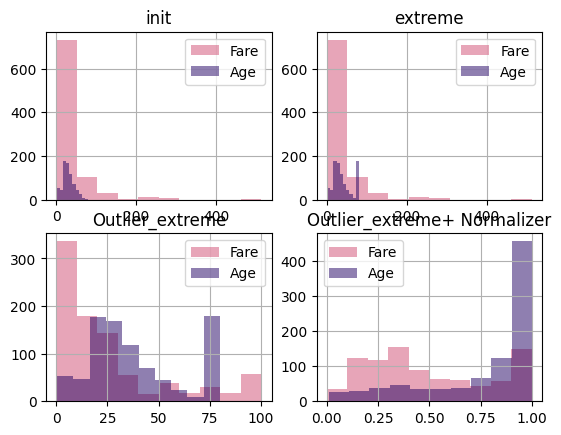

In [17]:
data_extreme_Outlier = outlier_process(data_extreme)
data_extreme_Outlier_Normalizer = Normalizer_(outlier_process(data_extreme))


plt.subplot(2,2,1)
data['Fare'].hist(color='#D14D72', alpha=0.5)    
data['Age'].hist(color='#210062', alpha=0.5)
plt.legend(['Fare', 'Age'])
plt.title('init')


plt.subplot(2,2,2)
data_extreme['Fare'].hist(color='#D14D72', alpha=0.5)    
data_extreme['Age'].hist(color='#210062', alpha=0.5)
plt.legend(['Fare', 'Age'])
plt.title('extreme')


plt.subplot(2,2,3)
data_extreme_Outlier ['Fare'].hist(color='#D14D72', alpha=0.5)    
data_extreme_Outlier ['Age'].hist(color='#210062', alpha=0.5)
plt.legend(['Fare', 'Age'])
plt.title('Outlier_extreme')


plt.subplot(2,2,4)
data_extreme_Outlier_Normalizer ['Fare'].hist(color='#D14D72', alpha=0.5)    
data_extreme_Outlier_Normalizer ['Age'].hist(color='#210062', alpha=0.5)
plt.legend(['Fare', 'Age'])
plt.title('Outlier_extreme+ Normalizer')


plt.show()



## Bài 8.1


In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

def mean_accuracy_cross_validation(data, is_data_add_new_feature):
   
    predictors = data[['Age', 'Fare']]
    if is_data_add_new_feature==True:
      predictors = data[['Age', 'Fare','Age_nan']]  
    target = data['Survived']
 
    pipe = make_pipeline(
    LogisticRegressionCV(),
   
    )   
    result = cross_validate(pipe, predictors,target )
    return np.mean(result['test_score']) # r_squared score is high because dataset is easy


accuracy_normal_cross_validation = {
  'mean': mean_accuracy_cross_validation(data_mean,False),
  'median': mean_accuracy_cross_validation(data_median,False),
  'mode': mean_accuracy_cross_validation(data_mode,False),
  'random': mean_accuracy_cross_validation(data_random,False),
  'extreme': mean_accuracy_cross_validation(data_extreme,False),
  'arbitrary': mean_accuracy_cross_validation(data_arbitrary,False),
  'addnewfeature': mean_accuracy_cross_validation(data_add_new_feature, True)
}
accuracy_normal_min_max_cross_validation = {
  'mean': mean_accuracy_cross_validation(min_Max(data_mean),False),
  'median': mean_accuracy_cross_validation(min_Max(data_median),False),
  'mode': mean_accuracy_cross_validation(min_Max(data_mode),False),
  'random': mean_accuracy_cross_validation(min_Max(data_random),False),
  'extreme': mean_accuracy_cross_validation(min_Max(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(min_Max(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(min_Max(data_add_new_feature), True)
}


accuracy_normal_robust_cross_validation = {
  'mean': mean_accuracy_cross_validation(Robust(data_mean),False),
  'median': mean_accuracy_cross_validation(Robust(data_median),False),
  'mode': mean_accuracy_cross_validation(Robust(data_mode),False),
  'random': mean_accuracy_cross_validation(Robust(data_random),False),
  'extreme': mean_accuracy_cross_validation(Robust(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(Robust(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(Robust(data_add_new_feature), True)
}
accuracy_outlier_process_robust_cross_validation = {
  'mean': mean_accuracy_cross_validation(Robust(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(Robust(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(Robust(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(Robust(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(Robust(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(Robust(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(Robust(outlier_process(data_add_new_feature)),True)

}

accuracy_outlier_process_cross_validation = {
  'mean': mean_accuracy_cross_validation(outlier_process(data_mean),False),
  'median': mean_accuracy_cross_validation(outlier_process(data_median),False),
  'mode': mean_accuracy_cross_validation(outlier_process(data_mode),False),
  'random': mean_accuracy_cross_validation(outlier_process(data_random),False),
  'extreme': mean_accuracy_cross_validation(outlier_process(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(outlier_process(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(outlier_process(data_add_new_feature),True)

}

accuracy_outlier_process_min_max_cross_validation = {
  'mean': mean_accuracy_cross_validation(min_Max(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(min_Max(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(min_Max(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(min_Max(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(min_Max(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(min_Max(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(min_Max(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_z_Score_cross_validation = {
  'mean': mean_accuracy_cross_validation(z_Score(data_mean),False),
  'median': mean_accuracy_cross_validation(z_Score(data_median),False),
  'mode': mean_accuracy_cross_validation(z_Score(data_mode),False),
  'random': mean_accuracy_cross_validation(z_Score(data_random),False),
  'extreme': mean_accuracy_cross_validation(z_Score(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(z_Score(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(z_Score(data_add_new_feature, True), True)
}
accuracy_outlier_process_z_Score_cross_validation = {
  'mean': mean_accuracy_cross_validation(z_Score(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(z_Score(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(z_Score(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(z_Score(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(z_Score(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(z_Score(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(z_Score(outlier_process(data_add_new_feature), True),True)

}

accuracy_normal_max_Abs_cross_validation = {
  'mean': mean_accuracy_cross_validation(max_Abs(data_mean),False),
  'median': mean_accuracy_cross_validation(max_Abs(data_median),False),
  'mode': mean_accuracy_cross_validation(max_Abs(data_mode),False),
  'random': mean_accuracy_cross_validation(max_Abs(data_random),False),
  'extreme': mean_accuracy_cross_validation(max_Abs(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(max_Abs(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(max_Abs(data_add_new_feature), True)
}
accuracy_outlier_process_max_Abs_cross_validation = {
  'mean': mean_accuracy_cross_validation(max_Abs(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(max_Abs(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(max_Abs(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(max_Abs(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(max_Abs(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(max_Abs(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(max_Abs(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_quantile_Transformer_cross_validation = {
  'mean': mean_accuracy_cross_validation(quantile_Transformer(data_mean),False),
  'median': mean_accuracy_cross_validation(quantile_Transformer(data_median),False),
  'mode': mean_accuracy_cross_validation(quantile_Transformer(data_mode),False),
  'random': mean_accuracy_cross_validation(quantile_Transformer(data_random),False),
  'extreme': mean_accuracy_cross_validation(quantile_Transformer(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(quantile_Transformer(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(quantile_Transformer(data_add_new_feature), True)
}
accuracy_outlier_process_quantile_Transformer_cross_validation = {
  'mean': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(quantile_Transformer(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_power_Transformer_cross_validation = {
  'mean': mean_accuracy_cross_validation(power_Transformer(data_mean),False),
  'median': mean_accuracy_cross_validation(power_Transformer(data_median),False),
  'mode': mean_accuracy_cross_validation(power_Transformer(data_mode),False),
  'random': mean_accuracy_cross_validation(power_Transformer(data_random),False),
  'extreme': mean_accuracy_cross_validation(power_Transformer(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(power_Transformer(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(power_Transformer(data_add_new_feature, True), True)
}
accuracy_outlier_process_power_Transformer_cross_validation = {
  'mean': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(power_Transformer(outlier_process(data_add_new_feature), True),True)

}



accuracy_normal_Normalizer_cross_validation = {
  'mean': mean_accuracy_cross_validation(Normalizer_(data_mean),False),
  'median': mean_accuracy_cross_validation(Normalizer_(data_median),False),
  'mode': mean_accuracy_cross_validation(Normalizer_(data_mode),False),
  'random': mean_accuracy_cross_validation(Normalizer_(data_random),False),
  'extreme': mean_accuracy_cross_validation(Normalizer_(data_extreme),False),
  'arbitrary': mean_accuracy_cross_validation(Normalizer_(data_arbitrary),False),
  'addnewfeature': mean_accuracy_cross_validation(Normalizer_(data_add_new_feature, True), True)
}

accuracy_outlier_process_Normalizer_cross_validation = {
  'mean': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_mean)),False),
  'median': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_median)),False),
  'mode': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_mode)),False),
  'random': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_random)),False),
  'extreme': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy_cross_validation(Normalizer_(outlier_process(data_add_new_feature), True),True)

}
df_8 = pd.DataFrame({'Normal_cross_validation': accuracy_normal_cross_validation,
                  'Normal_z_Score_cross_validation':accuracy_normal_z_Score_cross_validation,
                  'Normal_min_Max_cross_validation':accuracy_normal_min_max_cross_validation,
                  'Normal_Robust_cross_validation':accuracy_normal_robust_cross_validation,
                  'Normal_max_Abs_cross_validation':accuracy_normal_max_Abs_cross_validation,
                  'Normal_normalizer_cross_validation':accuracy_normal_Normalizer_cross_validation,
                  'Normal_quantile_Transformer_cross_validation':accuracy_normal_quantile_Transformer_cross_validation,
                  'Normal_power_Transformer_cross_validation':accuracy_normal_power_Transformer_cross_validation,

                  'Outlier_cross_validation':accuracy_outlier_process_cross_validation,
                  'Oulier_z_Score_cross_validation':accuracy_outlier_process_z_Score_cross_validation,
                  'Outlier_min_Max_cross_validation': accuracy_outlier_process_min_max_cross_validation,
                  'Outlier_Robust_cross_validation': accuracy_outlier_process_robust_cross_validation,
                  'Outlier_max_Abs_cross_validation':accuracy_outlier_process_max_Abs_cross_validation,
                  'Outlier_normalizer_cross_validation':accuracy_outlier_process_Normalizer_cross_validation,
                  'Outlier_quantile_Transformer_cross_validation':accuracy_outlier_process_quantile_Transformer_cross_validation,
                  'Outlier_power_Transformer_cross_validation':accuracy_outlier_process_power_Transformer_cross_validation,


                  })



In [19]:
styled_df_8 = df_8.style.highlight_max(color='#1689dd', axis=0)
styled_df_8

,Normal_cross_validation,Normal_z_Score_cross_validation,Normal_min_Max_cross_validation,Normal_Robust_cross_validation,Normal_max_Abs_cross_validation,Normal_normalizer_cross_validation,Normal_quantile_Transformer_cross_validation,Normal_power_Transformer_cross_validation,Outlier_cross_validation,Oulier_z_Score_cross_validation,Outlier_min_Max_cross_validation,Outlier_Robust_cross_validation,Outlier_max_Abs_cross_validation,Outlier_normalizer_cross_validation,Outlier_quantile_Transformer_cross_validation,Outlier_power_Transformer_cross_validation
mean,0.660003,0.656625,0.655502,0.659996,0.655502,0.689222,0.665671,0.672381,0.677999,0.673511,0.674616,0.673511,0.674616,0.684759,0.665671,0.673517
median,0.659996,0.656625,0.656625,0.659996,0.656625,0.692593,0.667918,0.672381,0.675758,0.671264,0.671270,0.673504,0.671270,0.693717,0.669041,0.672393
mode,0.661114,0.658873,0.661114,0.661120,0.661114,0.686981,0.663424,0.667912,0.675758,0.671270,0.670146,0.670146,0.670146,0.689210,0.665671,0.673523
random,0.666732,0.667855,0.670102,0.668979,0.670102,0.681357,0.662294,0.667905,0.672406,0.670159,0.673530,0.671282,0.673530,0.681351,0.664541,0.667905
extreme,0.665627,0.668991,0.668991,0.666750,0.668991,0.693742,0.669048,0.672400,0.667924,0.667918,0.673548,0.663424,0.673548,0.688130,0.674647,0.672393
arbitrary,0.664516,0.664503,0.664503,0.665633,0.664503,0.695964,0.673511,0.676875,0.673517,0.666782,0.672381,0.670140,0.672381,0.692593,0.674634,0.673511
addnewfeature,0.665627,0.663386,0.662262,0.664509,0.662262,0.695964,0.673511,0.675764,0.673517,0.664541,0.669035,0.669035,0.669035,0.692593,0.673511,0.675771


In [48]:

# In ra vị trí giá trị lớn nhất
print( df_8.stack().idxmax(), df_8.max().max() )

('arbitrary', 'Normal_normalizer_cross_validation') 0.6959638440775844


In [21]:
styled_df

,Normal,Normal_z_Score,Normal_min_Max,Normal_Robust,Normal_max_Abs,Normal_normalizer,Normal_quantile_Transformer,Normal_power_Transformer,Outlier,Oulier_z_Score,Outlier_min_Max,Outlier_Robust,Outlier_max_Abs,Outlier_normalizer,Outlier_quantile_Transformer,Outlier_power_Transformer
mean,0.652985,0.653358,0.646269,0.652985,0.646269,0.685448,0.669403,0.669030,0.667164,0.666791,0.669030,0.666791,0.669030,0.685075,0.668657,0.668657
median,0.653358,0.653358,0.647015,0.653358,0.647015,0.685075,0.672761,0.668657,0.667164,0.666045,0.669403,0.666045,0.669403,0.685448,0.670896,0.669403
mode,0.653358,0.652612,0.645522,0.653358,0.645522,0.686194,0.667910,0.667537,0.665672,0.665672,0.668657,0.665672,0.668657,0.686940,0.667910,0.670149
random,0.654478,0.653731,0.647015,0.655224,0.647015,0.676119,0.667910,0.668657,0.667910,0.668284,0.668657,0.667910,0.668657,0.677612,0.667537,0.668284
extreme,0.663806,0.663433,0.644776,0.663060,0.644776,0.690672,0.668657,0.670522,0.666418,0.666791,0.664925,0.666791,0.664925,0.693284,0.669776,0.669403
arbitrary,0.657463,0.657463,0.644776,0.656343,0.645149,0.686567,0.669403,0.669776,0.666045,0.666418,0.664925,0.665672,0.664925,0.685821,0.668657,0.672015
addnewfeature,0.659328,0.659328,0.643284,0.660075,0.643284,0.686567,0.669030,0.670896,0.662313,0.662687,0.663060,0.662687,0.663060,0.685821,0.669030,0.672761


In [22]:

# In ra vị trí giá trị lớn nhất
print(df.stack().idxmax(), df.max().max() )

('extreme', 'Outlier_normalizer') 0.6932835820895522


In [47]:
print('TB Độ cải thiện khi thay đổi kỹ thuật đánh giá')
print((df_8.mean().mean()-df.mean().mean())*100)

TB Độ cải thiện khi thay đổi kỹ thuật đánh giá
0.5889665323097204


## Bài 8.2

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


data_Normal_normalizer =Normalizer_(data_arbitrary)
# Load dataset
predictors = data_Normal_normalizer[['Age', 'Fare']]
target =data_Normal_normalizer['Survived']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform grid search to find optimal hyperparameters
params = {'penalty': ['l1', 'l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_    


# Train model on full training set with optimal hyperparameters
best_model.fit(X_train, y_train)
print(grid_search.best_params_)

# Evaluate model on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác là: {:.5f}".format(accuracy))
print("Độ cải thiện khi lựa chọn mô hình quy hồi có siêu tham số tốt nhất:{:.5f}".format((accuracy -df_8.max().max())*100 ))







{'C': 0.1, 'penalty': 'l2'}
Độ chính xác là: 0.71269
Độ cải thiện khi lựa chọn mô hình quy hồi có siêu tham số tốt nhất:1.67227
